<a href="https://colab.research.google.com/github/ameliacaroline/-ameliacaroline-python-data-science-regression/blob/main/Regress%C3%A3o_Linear_Base_de_dados_aleat%C3%B3rios_para_regress%C3%A3o_linear_simples_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TESTE-TEMA: Regressão Linear
##DF: Base de dados aleatorios para regressão linear simples.
## Disponível em: [https://www.kaggle.com/datasets/andonians/random-linear-regression?resource=download&select=train.csv](https://)

In [ ]:
import pandas as pd
df_train = pd.read_csv ('/content/train.csv')

In [ ]:
#verificando as informações de linha e coluna da base
print(f"linhas:{df_train.shape[0]}")
print(f"colunas:{df_train.shape[1]}")

linhas:700
colunas:2


##Exercicio 4.1: 
Definindo y como a variável preditora

In [ ]:
#definindo as variáveis dependentes (y) e independentes (X)
df_train.dropna(inplace=True) #removendo as linhas com valores nulos
y = df_train ['y'].values
X = df_train.drop ('y', axis= 1).values 

## Exercicio 4.2
• Variável preditora: y
(Crie a matriz–coluna e redimensione y)
• Faça a EDA dos dados com um scatter plot

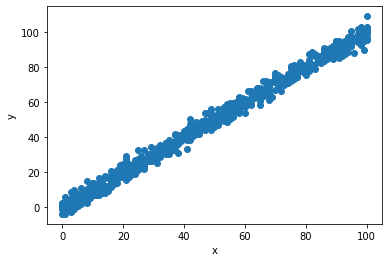

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Definindo X_alvo como a matriz-coluna
X_alvo = X[:,0]  #Reformulando X_alvo para ter apenas uma coluna
X_alvo = X_alvo.reshape(-1,1) #buscar exatamente o mesmo valor das linhas com -1, coluna 1. (mater o numero de linhas)

y = y.reshape(-1,1)  #Reformulando y para ter apenas uma coluna
# scatter plot 
# Criando um gráfico de dispersão com df_train
plt.scatter(df_train['x'], df_train['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Ajuste do modelo de regressão linear
Exercicio 4.3:

Fazer o ajuste da reta para os dados

Fazer o gráficod a reta

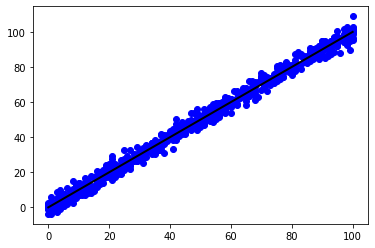

In [ ]:
import numpy as np
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(X_alvo, y) #Parametro de treinamento: Na frente a variável preditora e depois o alvo.
plt.scatter(X_alvo, y, color='blue')
prediction_space = np.linspace(min(X_alvo),max(X_alvo)).reshape(-1,1)
plt.plot(prediction_space, reg.predict(prediction_space),color='black',linewidth=2)
plt.show()

#Predições a partir da variável y (preditora)
## Exercicio 4.4:
Fazer a regressão da variável-alvo Y com todas as variáveis preditoras

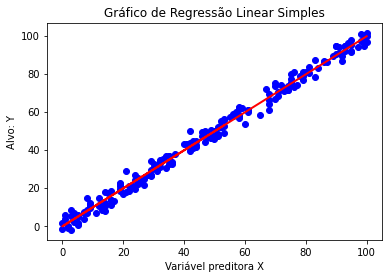

0.9910007028176463


In [ ]:
from sklearn.model_selection import train_test_split

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_alvo, y, test_size=0.3, random_state=42)

# Treinando o modelo com os dados de treinamento
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

# Realizando as previsões com os dados de teste
y_pred = reg.predict(X_test)

# tentando plotar os pontos de dados de teste e a nova linha de regressão
# Para casa.
plt.scatter(X_test.reshape(-1, 1), y_test.reshape(-1, 1), color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Gráfico de Regressão Linear Simples')
plt.xlabel('Variável preditora X')
plt.ylabel('Alvo: Y')
plt.show()

# avaliando o desempenho do modelo com o coeficiente de determinação
#print('Regressão Linear Simples (OLS)')
#r2_ols = reg.score(X_test, y_test)
#print('R²:', r2_ols)

print(reg.score(X_test, y_test))

##Exercicio 4.5
• Fazer a regressão com a CV dos dados do exercício anterior com cv=5

In [ ]:
from sklearn.model_selection import cross_val_score

#refazendo a regressão linear simples
reg = linear_model.LinearRegression() #instanciando o modelo
cv_results = cross_val_score(reg,X,y,cv=5) # realizando o cv utilizando a função cross_val_score(), onde são passados como parâmetros o modelo de regressão linear, as variáveis preditoras X, a variável dependente y e o número de folds (cv=5) p/ a divisão dos dados.
print('Lista de resultados do CV:',cv_results)
print('Média dos resulados:',np.mean(cv_results)) 


Lista de resultados do CV: [0.9887418  0.98975303 0.9922575  0.99023067 0.99089936]
Média dos resulados: 0.9903764720252457


##Exercicio 4.6
Ridge Regression (regressão regularizada)

> ESTUDO:  
*Ajustando um modelo de regressão linear Ridge aos dados divididos em subconjuntos de treinamento e teste.* 

> A primeira linha importa a classe Ridge do pacote scikit-learn. Em seguida, o conjunto de dados é dividido em subconjuntos de **treinamento** e** teste** usando a função train_test_split. O parâmetro test_size é definido como 0,3, o que significa que 30% dos dados são usados como conjunto de teste.

> Na terceira linha, a classe Ridge é instanciada com um parâmetro de regularização alpha de 0,1. Nesta linha não consegui utilizar o argumento(normalize=True)

> A quarta linha ajusta o modelo aos dados de treinamento usando o método fit.

> Na quinta linha, o modelo é usado para fazer previsões no conjunto de teste usando o método predict. As previsões são armazenadas em ridge_pred.

> A última linha calcula e imprime o coeficiente de determinação R² do modelo em relação aos dados de teste, que é uma medida da qualidade de ajuste do modelo. 

> O valor impresso é o R² do modelo em relação aos dados de teste.

In [ ]:
from sklearn.linear_model import Ridge

#conjunto de dados em dois subconjuntos, um p/ treinamento do modelo e outro p/ teste do modelo.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42) #O valor 42 é um número escolhido arbitrariamente para o parâmetro random_state na função train_test_split

# Instanciando o modelo
ridge_reg = Ridge(alpha=0.1)

# Fitting do Modelo
ridge_reg.fit(X_train,y_train)

# Predição
ridge_pred = ridge_reg.predict(X_test)
print('R²:',ridge_reg.score(X_test,y_test)) #imprimindo o valor do coeficiente de determinação (R-quadrado) da regressão ridge para as amostras de teste.

R²: 0.9910007008673734


## Exercicio 4.8
## Comparação entre OLS e Ridge Regression (usando 10-fold cross validation)
Verifique se há diferença estatisticamente significativa entre os coeficientes de determinação (R2) dos métodos: 
– Regressão OLS 
– Regressão Ridge com alfa = 0,1 
– Regressão Ridge com alfa = 0,5     

Para tal, utilize o teste de Kruskal-Wallis e o teste
a posteriori de Dunn, com 10 execuções para cada método.

In [ ]:
from scipy.stats import kruskal
